# EN2550: Assignment 03 on Object Counting on a Conveyor Belt
 # Connected Component Analysis

# Index No. 190432J
# Name: Pathirana R.P.U.A.
https://github.com/Uvin99/EN2550_Assignment3

In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

1. Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you.

In [1]:
# import libraries
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt 

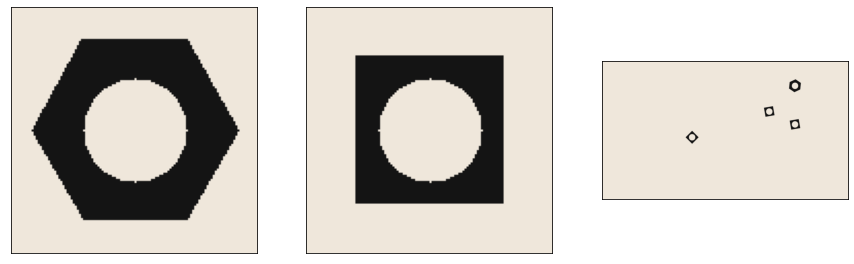

In [2]:
hexnut_template = cv.imread('assets/hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('assets/squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('assets/conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3, figsize = (15,5))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
ax[2].set_xticks([]), ax[2].set_yticks([])
plt.show()

2. Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

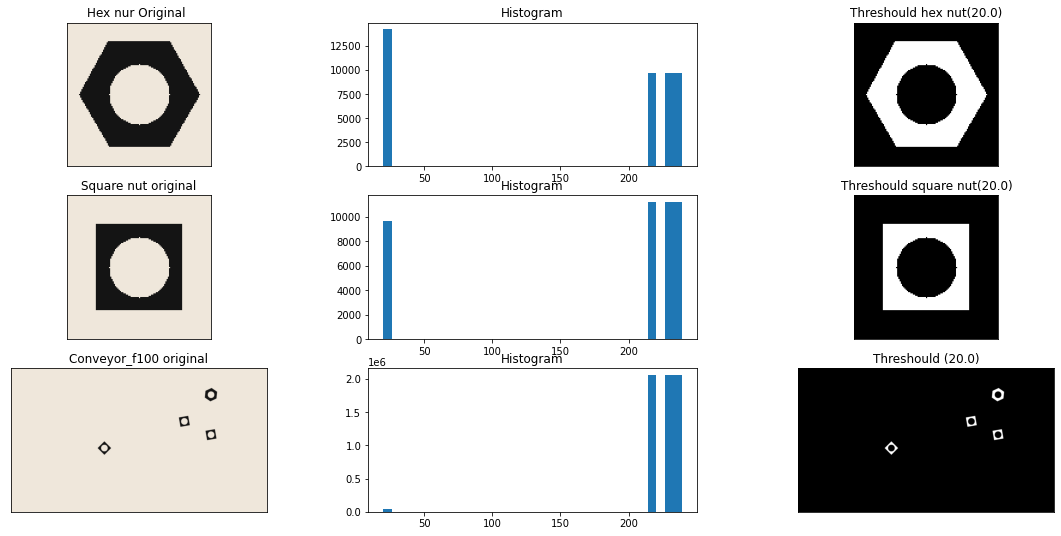

In [3]:
hex_gray = cv.cvtColor(hexnut_template, cv.COLOR_BGR2GRAY)
hex_ret , hex_th = cv.threshold(hex_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
squre_gray = cv.cvtColor(squarenut_template, cv.COLOR_BGR2GRAY)
squre_ret , squre_th = cv.threshold(squre_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
conveyor_f100_gray = cv.cvtColor(conveyor_f100,cv.COLOR_BGR2GRAY)
conveyor_f100_ret , conveyor_f100_th = cv.threshold(conveyor_f100_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
#To detect contours object shoud be white in a blck background . Therefore inverted.

imgs = [hexnut_template, 0, hex_th,
        squarenut_template, 0, squre_th,
        conveyor_f100, 0, conveyor_f100_th ]

titles = ["Hex nur Original ", "Histogram", f"Threshould hex nut({hex_ret})",
          "Square nut original", "Histogram", f"Threshould square nut({squre_ret})" ,
          "Conveyor_f100 original", "Histogram", f"Threshould ({conveyor_f100_ret})"]

plt.figure(figsize=(20,9))

for i in range(3):
    plt.subplot(3,3,i*3+1)
    plt.imshow(cv.cvtColor(imgs[i*3], cv.COLOR_BGR2RGB))
    plt.title(titles[i*3])
    plt.xticks([]), plt.yticks([])

    plt.subplot(3,3,i*3+2)
    plt.hist(imgs[i*3].ravel(), 35)
    plt.title(titles[i*3+1])


    plt.subplot(3,3,i*3+3)
    plt.imshow(cv.cvtColor(imgs[i*3+2], cv.COLOR_BGR2RGB))
    plt.title(titles[i*3+2])
    plt.xticks([]), plt.yticks([])



3. Carry out morphological closing to remove small holes inside the foreground. Use a 3×3 kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

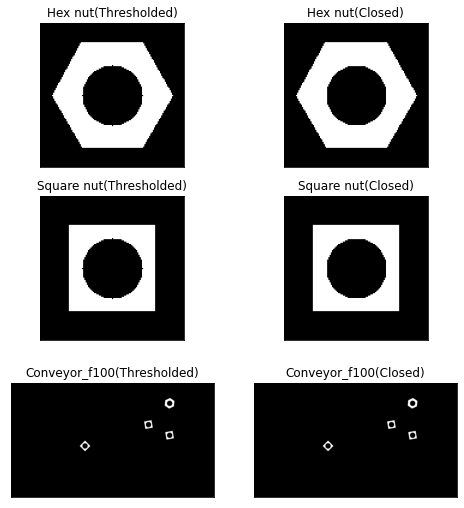

In [9]:
kernal =  np.ones((3,3),np.uint8)
closed_hexImg = cv.morphologyEx(hex_th,cv.MORPH_CLOSE, kernal)
closed_squreImg = cv.morphologyEx(squre_th,cv.MORPH_CLOSE, kernal)
closed_conveyor_f100 = cv.morphologyEx(conveyor_f100_th,cv.MORPH_CLOSE, kernal)

images = [hex_th, closed_hexImg, squre_th, closed_squreImg, conveyor_f100_th, closed_conveyor_f100]
titles = ["Hex nut(Thresholded)","Hex nut(Closed)","Square nut(Thresholded)","Square nut(Closed)", "Conveyor_f100(Thresholded)","Conveyor_f100(Closed)"]

plt.figure(figsize=(8,9))

for i in range(3):
    plt.subplot(3,2,i*2+1), plt.imshow(cv.cvtColor(images[i*2], cv.COLOR_BGR2RGB))
    plt.title(titles[i*2]), plt.xticks([]), plt.yticks([])
    plt.subplot(3,2,i*2+2), plt.imshow(cv.cvtColor(images[i*2+1], cv.COLOR_BGR2RGB))
    plt.title(titles[i*2+1]), plt.xticks([]), plt.yticks([])

    

4. Connected components analysis: apply the connectedComponentsWithStats function <br>(see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. 
Answer the following questions<br>
i)   How many connected components are detected in each image? <br>
ii)  What are the statistics? Interpret these statistics.<br>
iii) What are the centroids?
<br> For the hexnut template, you should get the object area in pixel as approximately 4728.

Hexnut Template 
No. of components detected:  2
╒═════════╤══════════════════╤══════════════════════╤════════╤════════════╕
│   Label │ Top-Left Index   │ Bottom-Right Index   │   Area │ centroid   │
╞═════════╪══════════════════╪══════════════════════╪════════╪════════════╡
│       1 │ (0, 0)           │ (120, 120)           │   9672 │ (59, 60)   │
├─────────┼──────────────────┼──────────────────────┼────────┼────────────┤
│       2 │ (10, 16)         │ (111, 117)           │   4728 │ (60, 59)   │
╘═════════╧══════════════════╧══════════════════════╧════════╧════════════╛
Squrenut_Template
No. of components detected:  2
╒═════════╤══════════════════╤══════════════════════╤════════╤════════════╕
│   Label │ Top-Left Index   │ Bottom-Right Index   │   Area │ centroid   │
╞═════════╪══════════════════╪══════════════════════╪════════╪════════════╡
│       1 │ (0, 0)           │ (120, 120)           │  11173 │ (60, 60)   │
├─────────┼──────────────────┼──────────────────────┼────────┼─────

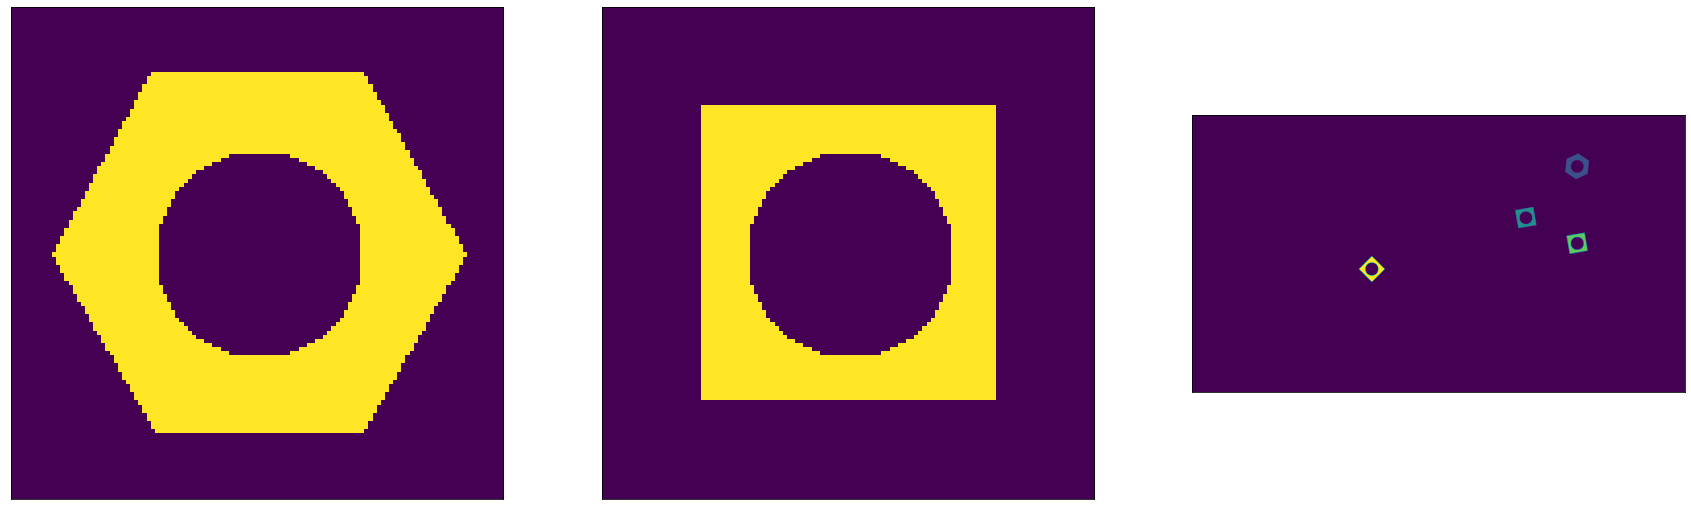

In [10]:
from tabulate import tabulate
closed_imgs =  [closed_hexImg, closed_squreImg, closed_conveyor_f100]
closed_titles = ["Hexnut Template ","Squrenut_Template","Conveyor_f100"]

fig, ax = plt.subplots(1,3,figsize = (30,10))

for i in range(3):
    print(closed_titles[i])
    retvals , labels, stats , centroids = cv.connectedComponentsWithStats(closed_imgs[i])
    print("No. of components detected: ", retvals)
    iterations = []
    Headers = ["Label", "Top-Left Index","Bottom-Right Index","Area","centroid"]

    for j in range(retvals):
        x = round(stats[j, cv.CC_STAT_LEFT],2)
        y = round(stats[j, cv.CC_STAT_TOP],2)
        w = round(stats[j, cv.CC_STAT_WIDTH],2)
        h = round(stats[j, cv.CC_STAT_HEIGHT],2)
        area = round(stats[j,cv.CC_STAT_AREA])

        iterations.append([j+1, (x,y),(x+w,y+w),area, (round(centroids[j][0]),round(centroids[j][1]))])
    print(tabulate(iterations, headers = Headers, tablefmt='fancy_grid' ))

    ax[i].imshow(labels )  
    ax[i].set_xticks([]), ax[i].set_yticks([])


5. Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.

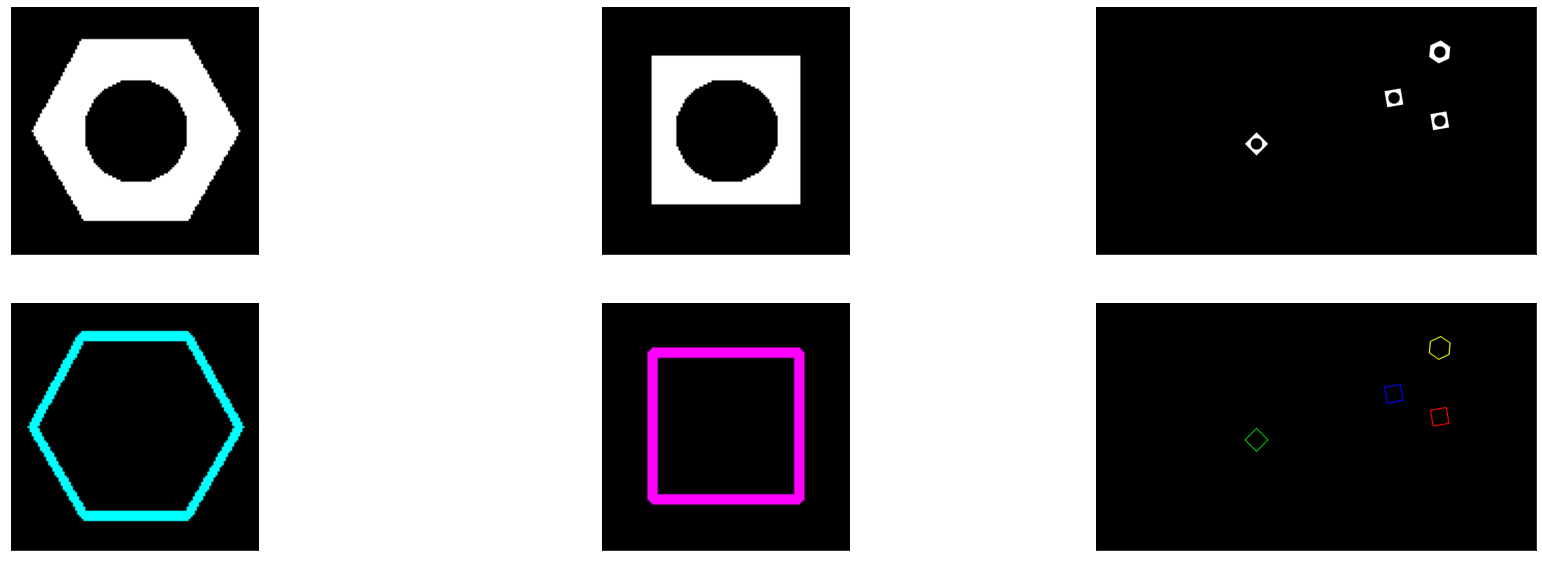

In [6]:
import random
closed_imgs =  [closed_hexImg, closed_squreImg, closed_conveyor_f100]
closed_titles = ["Hexnut Template ","Squrenut_Template","Conveyor_f100"]

fig, ax = plt.subplots(2,3,figsize = (30,10))
colors = [(255,0,0),(0,255,0),(0,0,255),(0,255,255),(255,255,0),(255,0,255)]
random.shuffle(colors)
# RGB values of six colors are given in a list and shuffel is used to to get a random color


x=0
for i in range(3):
    ax[0,i].imshow(cv.cvtColor(closed_imgs[i], cv.COLOR_GRAY2BGR))
    ax[0,i].set_xticks([]), ax[0,i].set_yticks([])
    contours, hierarchy = cv.findContours(closed_imgs[i], cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    blank_img = np.zeros(closed_imgs[i].shape,np.uint8)
    blank_img = cv.cvtColor(blank_img, cv.COLOR_GRAY2BGR)
    for j in range(len(contours)):
        if (hierarchy[0,j,3]==-1):
            cv.drawContours(blank_img, contours, j, colors[x%6], 3)
            x+=1
    ax[1,i].imshow(blank_img)
    ax[1,i].set_xticks([]), ax[1,i].set_yticks([])





# Detecting Objects on a Synthetic Conveyor
In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

1. Open the sequence and play it using the code below.

In [22]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('assets/conveyor.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (1080, 1920), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    # changed the aspect ratio
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


2. Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contours in each frame with that in th template.

No. of matches:  1


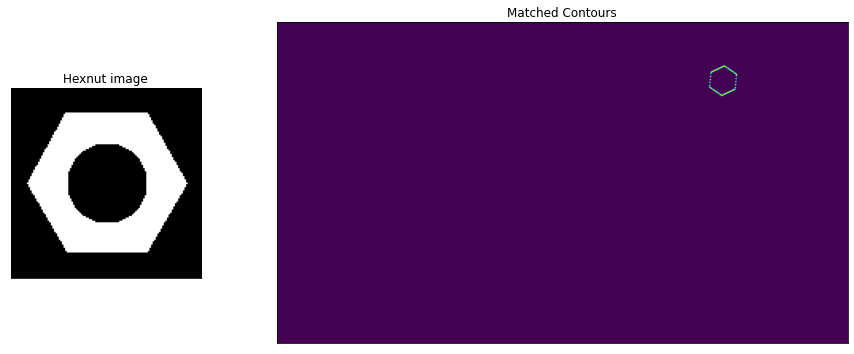

In [16]:
contours, hierarchy = cv.findContours(closed_conveyor_f100, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
contours_hex, hierarchy_hex = cv.findContours(closed_hexImg, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

frame1 = closed_conveyor_f100
img_to_be_matched = contours_hex[0]

matches = 0
contours_matched = []

for i in contours:
    ret = cv.matchShapes(i,img_to_be_matched,1,0.0)
    if (ret<0.0001):
        matches +=1
        contours_matched.append(i)

print("No. of matches: ", matches)

blank_img = np.zeros(closed_conveyor_f100.shape,np.uint8)
for i in range(len(contours_matched)):
    cv.drawContours(blank_img, contours_matched[i], -1, (255,0,0),3,cv.LINE_AA)

fig, ax = plt.subplots(1,2,figsize = (15,8),gridspec_kw={'width_ratios': [1, 3]})
ax[0].imshow(cv.cvtColor(closed_hexImg, cv.COLOR_GRAY2BGR))
ax[0].set_xticks([]), ax[0].set_yticks([])
ax[0].set_title("Hexnut image")
ax[1].imshow(blank_img)
ax[1].set_xticks([]), ax[1].set_yticks([])
ax[1].set_title("Matched Contours")
plt.show()



3. Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames conveyor_f100.png and conveyor_f101.png. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function.

In [24]:
cap = cv.VideoCapture('assets/conveyor.mp4')

f = 0
frame = []    
total_matches = 0
frame_array = []
initalizer = 0
initial_cord = []

while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    frame_gray = cv.cvtColor(frame , cv.COLOR_BGR2GRAY)
    frame_ret , frame_th = cv.threshold(frame_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
    kernel = np.ones((3,3),np.uint8)
    frame_closed  = cv.morphologyEx(frame_th, cv.MORPH_CLOSE, kernel)

    #Connected component analysis

    retvals , labels, stats , centroids = cv.connectedComponentsWithStats(frame_closed, 4, cv.CV_32S)

    matches =0
    contours_matched = []


    for i in range(1,retvals):
        area = stats[i, cv.CC_STAT_AREA]
        (cX, cY) = centroids[i]
        componentMask = (labels == i).astype("uint8") * 255
        contours_mask, hierarchy_mask = cv.findContours(componentMask , mode=cv.RETR_EXTERNAL, method=cv.CHAIN_APPROX_NONE)


        image_to_be_matched = contours_hex[0]
        
        for j in contours_mask:
            ret = cv.matchShapes(j, image_to_be_matched ,1,0.0)
            if (ret < 0.001 and area > 4600): 
                matches += 1
                
                contours_matched.append(j)

                if(initalizer == 0):
                    initial_cord.append([cX,cY])
                    initalizer += 1

                
                if (cX < initial_cord[0][0]+3 and cX > initial_cord[0][0]-3):
                    total_matches += 1
    
    for i in range(len(contours_matched)):
        cv.drawContours(frame, contours_matched[i], -1, (255,0,0),3,cv.LINE_AA)
    
    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 50), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv.LINE_AA)
    cv.putText(frame, "Matches in current frame:"+ str(matches) , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv.LINE_AA)
    cv.putText(frame, "Total matches:"+ str(total_matches) , (100, 150), cv.FONT_HERSHEY_COMPLEX, 1, (0,0,255), 1, cv.LINE_AA)
    frame_array.append(frame)
    

cap.release()


shape = (1080, 1920, 3)

# Your code here
out = cv.VideoWriter('./conveyor_result_190432J.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

    



Can't receive frame (stream end?). Exiting.


In [30]:
hexnut = cv.imread('assets/hexnut_template.png', cv.IMREAD_COLOR)
conveyor_f100 = cv.imread('assets/conveyor_f100.png', cv.IMREAD_COLOR)
conveyor_f101 = cv.imread('assets/conveyor_f101.png', cv.IMREAD_COLOR)

hexnut_gray = cv.cvtColor(hexnut, cv.COLOR_RGB2GRAY)
conveyor_f100_gray = cv.cvtColor(conveyor_f100, cv.COLOR_RGB2GRAY)
conveyor_f101_gray = cv.cvtColor(conveyor_f101, cv.COLOR_RGB2GRAY)

hex_ret , hex_th = cv.threshold(hex_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
con_f100_ret , con_f100_th = cv.threshold(conveyor_f100_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)
con_f101_ret , con_f101_th = cv.threshold(conveyor_f101_gray, 0, 255, cv.THRESH_BINARY_INV + cv.THRESH_OTSU)

hexnut_closed = cv.morphologyEx(hex_th, cv.MORPH_CLOSE, kernel)
con_f100_closed = cv.morphologyEx(con_f100_th, cv.MORPH_CLOSE, kernel)
con_f101_closed = cv.morphologyEx(con_f101_th, cv.MORPH_CLOSE, kernel)

retvals , labels, stats , centroids = cv.connectedComponentsWithStats(con_f101_closed, 4, cv.CV_32S)

for i in range(retvals):
    x = stats[i, cv.CC_STAT_LEFT]
    y = stats[i, cv.CC_STAT_TOP]
    w = stats[i, cv.CC_STAT_WIDTH]
    h = stats[i, cv.CC_STAT_HEIGHT]
    area = stats[i, cv.CC_STAT_AREA]
    (cX, cY) = round( centroids[i][0],2),round( centroids[i][1],2)
    print("Area:", area, " ", "(cx,cy) = ", (cX, cY))



Area: 2059646   (cx,cy) =  (957.43, 540.44)
Area: 4636   (cx,cy) =  (1489.24, 199.29)
Area: 3087   (cx,cy) =  (1289.18, 399.18)
Area: 3087   (cx,cy) =  (1489.18, 499.18)
Area: 3144   (cx,cy) =  (690.0, 600.0)
